In [1]:
from ising.lattices import square_random_lattice
from ising.checkerboard import *
from ising.visualize import (
    lattices_to_images,
    upscale_lattices,
    display_experiment,
    save_gif,
)
from ising.data_farm import magnetization_convergence, magnetization_from_lattices
import matplotlib.pyplot as plt
import numpy as np
import ising.plot_styling

In [2]:
N, M = 50, 50
lattice = square_random_lattice(N, M, states=[-1, 1])

In [7]:
def neighbour_sum_square(lattice: Lattice) -> Lattice:
    """Compute the neighboursum of each spin in a square lattice."""

    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

    return convolve(lattice, kernel, mode="wrap")


def H(lattice, h_J):
    return - (neighbour_sum_square(lattice)*(1/2) + h_J) * lattice


def _cv(lattices, h_J, T):
    Hs = np.array([H(lattice, h_J) for lattice in lattices])
    return np.var( Hs*T )


def cv(lattice, h_J, iterations):

    n = 10
    Ts = np.linspace(1.8, 2.8, n)
    cvs = np.empty( (n,) )

    for i, T in enumerate(Ts):
        lattices = simulate(lattice=lattice.copy(), h_J=h_J, T=T, steps=iterations)
        cvs[i] = _cv(lattices, h_J, T)

    return Ts, cvs

In [8]:
res = cv(lattice=lattice.copy(), h_J=1, iterations=1000)

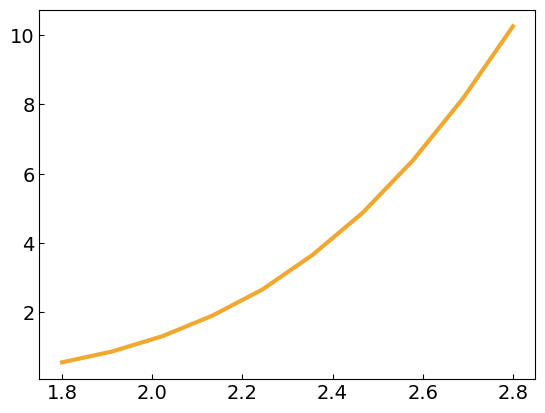

In [ ]:
plt.plot(*res)